In [56]:
import pandas as pd
from ast import literal_eval

In [57]:
df_11p4 = pd.read_pickle("11p4/latent_representation_for_5.pkl")

In [129]:
df_7p2 = pd.read_pickle("7p2/latent_representation_for_5.pkl")

In [130]:
df_7p2.shape

(26448, 50)

In [71]:
df_11p4_res = pd.read_csv("result_11p4.csv")

In [124]:
df_7p2_res = pd.read_csv("result_7p2.csv")

In [125]:
df_7p2_res.shape

(5290, 51)

In [131]:
filtered_7p2 = pd.merge(df_7p2, df_7p2_res[['x', 'y', 'z']], how='inner', on=['x', 'y', 'z'])
filtered_7p2.shape

(5290, 50)

In [72]:
filtered_11p4 = pd.merge(df_11p4, df_11p4_res[['x', 'y', 'z']], how='inner', on=['x', 'y', 'z'])
filtered_11p4.shape

(5290, 50)

In [75]:
from SimplifiedLatentDecoderRing import LatentDecoderRing
import torch

In [77]:
model_path = '/Users/HesamFallahian/Sources/cgan/saved_models/WAE_0043_Latent_model_at_epoch_100.pth'
latent_decoder_ring = LatentDecoderRing(model_path)

In [79]:
column_names = [f'latent_{i}' for i in range(47)] 
filtered_11p4['latent_all'] = list(zip(*[filtered_11p4[name] for name in column_names]))
df_11p4_res['latent_all'] = list(zip(*[df_11p4_res[name] for name in column_names]))

In [126]:
df_7p2_res['latent_all'] = list(zip(*[df_7p2_res[name] for name in column_names]))

In [132]:
filtered_7p2['latent_all'] = list(zip(*[filtered_7p2[name] for name in column_names]))

In [86]:
filtered_11p4['original'] = filtered_11p4['latent_all'].apply(lambda x: latent_decoder_ring.Centroid_Only_DeNormalized(torch.tensor(x))) 

In [127]:
df_7p2_res['original'] = df_7p2_res['latent_all'].apply(lambda x: latent_decoder_ring.Centroid_Only_DeNormalized(torch.tensor(x))) 

In [87]:
df_11p4_res['original'] = df_11p4_res['latent_all'].apply(lambda x: latent_decoder_ring.Centroid_Only_DeNormalized(torch.tensor(x))) 

In [133]:
filtered_7p2['original'] = filtered_7p2['latent_all'].apply(lambda x: latent_decoder_ring.Centroid_Only_DeNormalized(torch.tensor(x))) 

In [93]:
df_11p4_res[['orig_x', 'orig_y', 'orig_z']] = pd.DataFrame(df_11p4_res['original'].tolist(), index=df_11p4_res.index)
filtered_11p4[['orig_x', 'orig_y', 'orig_z']] = pd.DataFrame(filtered_11p4['original'].tolist(), index=filtered_11p4.index)

In [128]:
df_7p2_res[['orig_x', 'orig_y', 'orig_z']] = pd.DataFrame(df_7p2_res['original'].tolist(), index=df_7p2_res.index)

In [134]:
filtered_7p2[['orig_x', 'orig_y', 'orig_z']] = pd.DataFrame(filtered_7p2['original'].tolist(), index=filtered_7p2.index)

In [94]:
df_11p4_res

time      x     y     z  latent_0  latent_1  latent_2  latent_3  \
0        5 -117.0  71.0 -25.0 -0.042423 -0.027563 -0.066470 -0.124332   
1        5  -97.0  71.0 -25.0 -0.045458 -0.024816 -0.062963 -0.129485   
2        5  -78.0  71.0 -25.0 -0.058606 -0.029585 -0.061603 -0.136149   
3        5  -58.0  71.0 -25.0 -0.050872 -0.030096 -0.055516 -0.129107   
4        5  -38.0  71.0 -25.0 -0.062007 -0.028094 -0.045811 -0.135375   
...    ...    ...   ...   ...       ...       ...       ...       ...   
5285     5   22.0 -76.0  18.0 -0.059647 -0.020499 -0.055552 -0.129533   
5286     5   41.0 -76.0  18.0 -0.054152 -0.021495 -0.070256 -0.130441   
5287     5   61.0 -76.0  18.0 -0.079240 -0.027646 -0.059440 -0.130612   
5288     5   81.0 -76.0  18.0 -0.079287 -0.018144 -0.041577 -0.146105   
5289     5  101.0 -76.0  18.0 -0.062979 -0.017919 -0.063666 -0.127576   

      latent_4  latent_5  ...  latent_42  latent_43  latent_44  latent_45  \
0    -0.188019  0.052074  ...  -0.024412   0.014820  -0.125044  -0.057959   
1    -0.195268  0.045797  ...  -0.017557   0.009342  -0.124235  -0.066208   
2    -0.193426  0.039502  ...  -0.008349   0.028589  -0.127978  -0.061837   
3    -0.185530  0.045153  ...  -0.021302   0.016412  -0.116320  -0.056732   
4    -0.198459  0.036928  ...  -0.008474   0.023993  -0.125941  -0.061652   
...        ...       ...  ...        ...        ...        ...        ...   
5285 -0.187819  0.037268  ...  -0.029023   0.015504  -0.130982  -0.069055   
5286 -0.193452  0.039079  ...  -0.035273   0.012391  -0.111558  -0.067463   
5287 -0.183469  0.042791  ...  -0.019061  -0.023468  -0.110145  -0.075845   
5288 -0.189404  0.043527  ...  -0.034063  -0.047452  -0.094285  -0.105580   
5289 -0.197293  0.023886  ...  -0.024492  -0.053753  -0.052867  -0.073998   

      latent_46                                         latent_all  \
0      0.193453  (-0.0424233078956604, -0.0275629237294197, -0....   
1      0.188897  (-0.045458048582077, -0.0248159691691398, -0.0...   
2      0.190791  (-0.0586059018969535, -0.0295853391289711, -0....   
3      0.194606  (-0.0508715063333511, -0.0300957188010215, -0....   
4      0.188644  (-0.0620067864656448, -0.0280943661928176, -0....   
...         ...                                                ...   
5285   0.182345  (-0.0596470460295677, -0.020498864352703, -0.0...   
5286   0.181833  (-0.0541523322463035, -0.0214945450425148, -0....   
5287   0.170390  (-0.0792399570345878, -0.0276458635926246, -0....   
5288   0.174066  (-0.0792867615818977, -0.0181439593434333, -0....   
5289   0.165005  (-0.0629790052771568, -0.0179191902279853, -0....   

                                               original    orig_x    orig_y  \
0     (1.7221524488925934, 0.11218744218349468, 0.01...  1.722152  0.112187   
1     (1.72196932554245, 0.10753046393394482, -0.005...  1.721969  0.107530   
2     (1.7109472274780275, 0.1123143893480302, 0.008...  1.710947  0.112314   
3     (1.7215226697921755, 0.04809895098209392, 0.04...  1.721523  0.048099   
4     (1.6681037986278535, 0.052063089609146226, 0.0...  1.668104  0.052063   
...                                                 ...       ...       ...   
5285  (1.6692014372348787, 0.017962217330932728, 0.0...  1.669201  0.017962   
5286  (1.6679936492443086, 0.013919597268104664, 0.0...  1.667994  0.013920   
5287  (1.6963725364208222, -0.05728619635105122, 0.0...  1.696373 -0.057286   
5288  (1.667486962080002, -0.06805522620677937, 0.19...  1.667487 -0.068055   
5289  (1.6901548790931702, -0.3463952833414077, 0.07...  1.690155 -0.346395   

        orig_z  
0     0.015531  
1    -0.005981  
2     0.008822  
3     0.049904  
4     0.055797  
...        ...  
5285  0.036146  
5286  0.019860  
5287  0.037444  
5288  0.194382  
5289  0.075137  

[5290 rows x 56 columns]

In [95]:
filtered_11p4

x     y     z  latent_0  latent_1  latent_2  latent_3  latent_4  \
0    -117.0  71.0 -25.0 -0.042300 -0.027965 -0.067363 -0.124669 -0.187327   
1     -97.0  71.0 -25.0 -0.045418 -0.024808 -0.063257 -0.129604 -0.195003   
2     -78.0  71.0 -25.0 -0.058468 -0.029484 -0.061914 -0.136591 -0.193166   
3     -58.0  71.0 -25.0 -0.050843 -0.030384 -0.055771 -0.129470 -0.185267   
4     -38.0  71.0 -25.0 -0.061767 -0.027850 -0.045930 -0.135462 -0.198394   
...     ...   ...   ...       ...       ...       ...       ...       ...   
5285   22.0 -76.0  18.0 -0.059544 -0.020413 -0.055396 -0.129610 -0.187529   
5286   41.0 -76.0  18.0 -0.054127 -0.021481 -0.070754 -0.130787 -0.192740   
5287   61.0 -76.0  18.0 -0.079148 -0.027735 -0.059446 -0.130575 -0.183418   
5288   81.0 -76.0  18.0 -0.079512 -0.017448 -0.041363 -0.145554 -0.189490   
5289  101.0 -76.0  18.0 -0.062815 -0.017291 -0.064407 -0.126751 -0.198014   

      latent_5  latent_6  ...  latent_42  latent_43  latent_44  latent_45  \
0     0.052471  0.077821  ...  -0.024121   0.014933  -0.124442  -0.057707   
1     0.046272  0.068796  ...  -0.017367   0.009407  -0.124366  -0.066067   
2     0.039772  0.067390  ...  -0.007818   0.028338  -0.127983  -0.061913   
3     0.045555  0.057861  ...  -0.021126   0.016955  -0.115895  -0.056322   
4     0.036941  0.058278  ...  -0.008257   0.024212  -0.126110  -0.061737   
...        ...       ...  ...        ...        ...        ...        ...   
5285  0.037479  0.056239  ...  -0.028495   0.015412  -0.131409  -0.069491   
5286  0.039390  0.058985  ...  -0.035165   0.012547  -0.111526  -0.067691   
5287  0.043538  0.066947  ...  -0.019241  -0.023199  -0.110401  -0.075318   
5288  0.043660  0.057844  ...  -0.034141  -0.048148  -0.093803  -0.105867   
5289  0.023435  0.077983  ...  -0.023947  -0.054348  -0.052279  -0.073455   

      latent_46                                         latent_all  \
0      0.193276  (-0.04229986295104027, -0.027965404093265533, ...   
1      0.189357  (-0.045418430119752884, -0.02480805478990078, ...   
2      0.190784  (-0.05846841260790825, -0.029483815655112267, ...   
3      0.194456  (-0.0508425198495388, -0.0303842443972826, -0....   
4      0.188284  (-0.06176668778061867, -0.027849966660141945, ...   
...         ...                                                ...   
5285   0.182827  (-0.05954370275139809, -0.020412752404808998, ...   
5286   0.181601  (-0.054127078503370285, -0.021481256932020187,...   
5287   0.170280  (-0.07914802432060242, -0.027734927833080292, ...   
5288   0.173424  (-0.07951241731643677, -0.017447935417294502, ...   
5289   0.165129  (-0.06281539052724838, -0.01729091815650463, -...   

                                               original    orig_x    orig_y  \
0     (1.7198098468780518, 0.11371714174747478, 0.01...  1.719810  0.113717   
1     (1.7219707024097444, 0.10828319728374493, -0.0...  1.721971  0.108283   
2     (1.709972130060196, 0.11494806110858928, 0.008...  1.709972  0.114948   
3     (1.720313504934311, 0.04788884103298198, 0.049...  1.720314  0.047889   
4     (1.6666371595859528, 0.05440321326255809, 0.05...  1.666637  0.054403   
...                                                 ...       ...       ...   
5285  (1.671032946109772, 0.020496066212654224, 0.03...  1.671033  0.020496   
5286  (1.6671110773086548, 0.017060782313346973, 0.0...  1.667111  0.017061   
5287  (1.696475250720978, -0.055886197686195266, 0.0...  1.696475 -0.055886   
5288  (1.6707013964653017, -0.06722552597522724, 0.1...  1.670701 -0.067226   
5289  (1.6934100687503817, -0.3484001398086547, 0.07...  1.693410 -0.348400   

        orig_z  
0     0.015168  
1    -0.005287  
2     0.008830  
3     0.049872  
4     0.056094  
...        ...  
5285  0.037926  
5286  0.019203  
5287  0.034466  
5288  0.191975  
5289  0.073053  

[5290 rows x 55 columns]

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

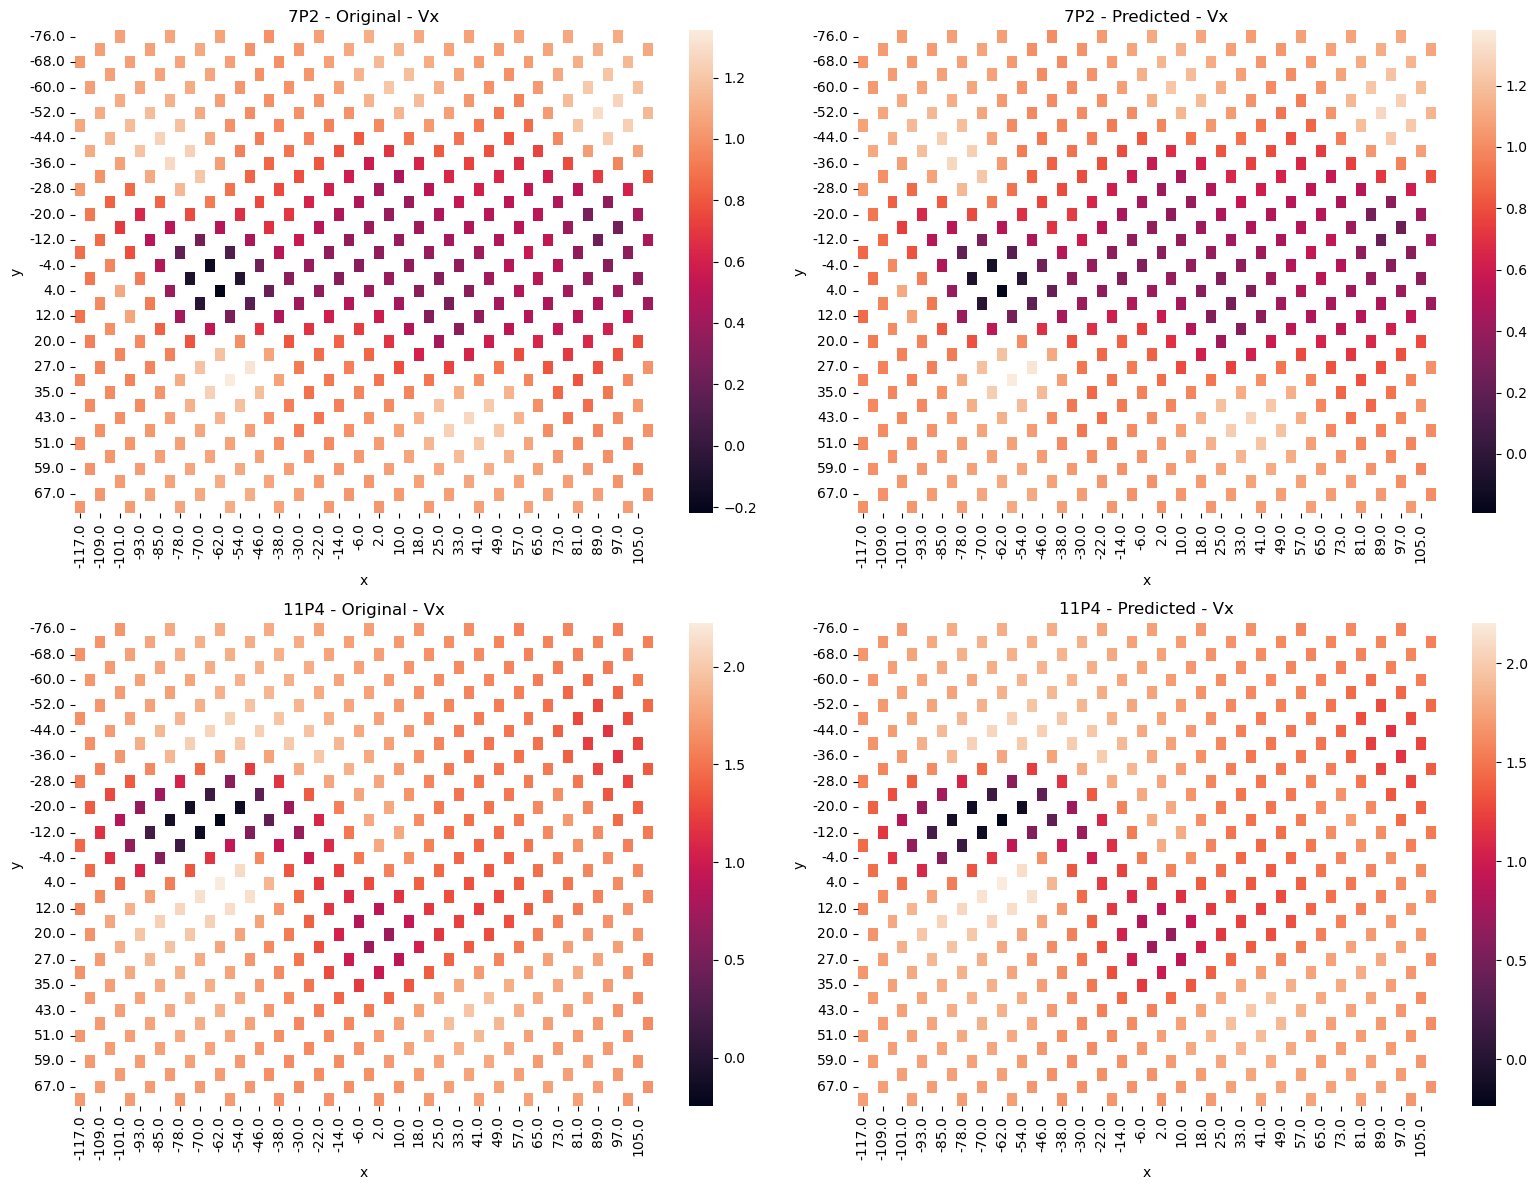

In [138]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

pivot_table1 = filtered_7p2[filtered_7p2["z"] == -25.0].pivot(index='y', columns='x', values='orig_x')
sns.heatmap(pivot_table1, ax=axs[0, 0])
axs[0, 0].set_title('7P2 - Original - Vx')

pivot_table2 = df_7p2_res[df_7p2_res["z"] == -25.0].pivot(index='y', columns='x', values='orig_x')
sns.heatmap(pivot_table2, ax=axs[0, 1])
axs[0, 1].set_title('7P2 - Predicted - Vx')

pivot_table3 = filtered_11p4[filtered_11p4["z"] == -25.0].pivot(index='y', columns='x', values='orig_x')
sns.heatmap(pivot_table3, ax=axs[1, 0])
axs[1, 0].set_title('11P4 - Original - Vx')

pivot_table4 = df_11p4_res[df_11p4_res["z"] == -25.0].pivot(index='y', columns='x', values='orig_x')
sns.heatmap(pivot_table4, ax=axs[1, 1])
axs[1, 1].set_title('11P4 - Predicted - Vx')

plt.tight_layout()
plt.show()


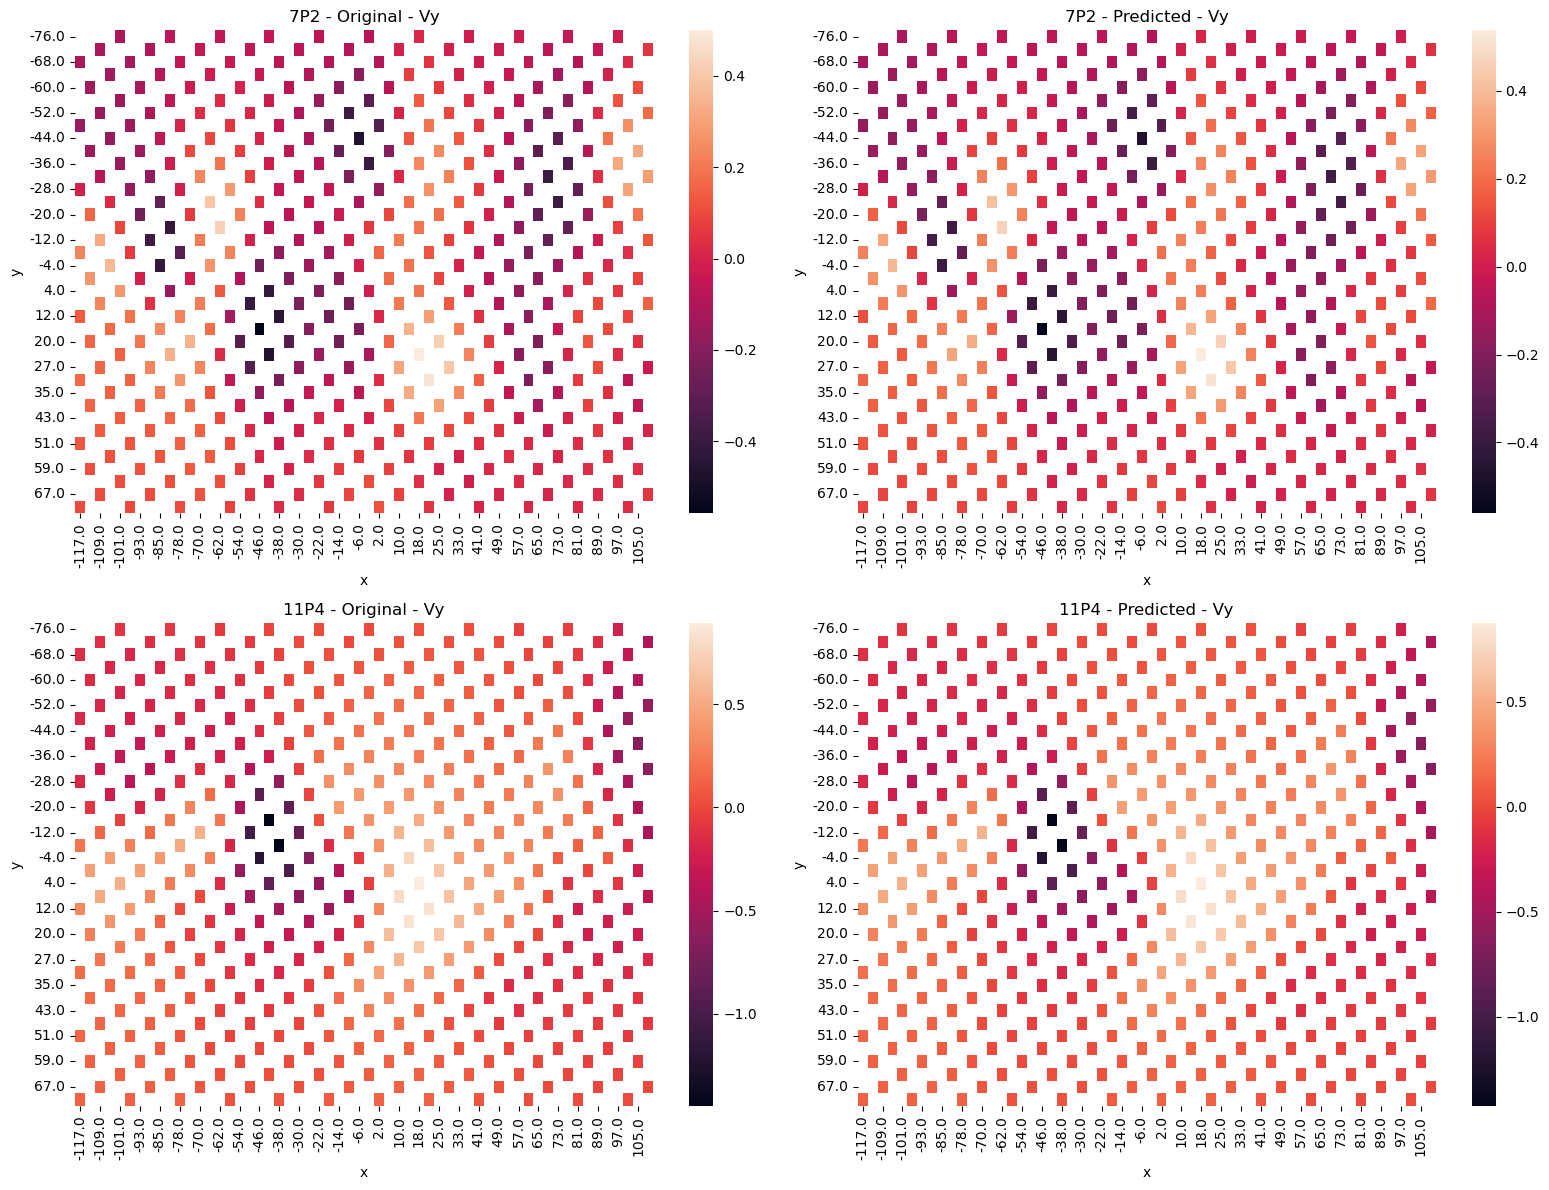

In [139]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

pivot_table1 = filtered_7p2[filtered_7p2["z"] == -25.0].pivot(index='y', columns='x', values='orig_y')
sns.heatmap(pivot_table1, ax=axs[0, 0])
axs[0, 0].set_title('7P2 - Original - Vy')

pivot_table2 = df_7p2_res[df_7p2_res["z"] == -25.0].pivot(index='y', columns='x', values='orig_y')
sns.heatmap(pivot_table2, ax=axs[0, 1])
axs[0, 1].set_title('7P2 - Predicted - Vy')

pivot_table3 = filtered_11p4[filtered_11p4["z"] == -25.0].pivot(index='y', columns='x', values='orig_y')
sns.heatmap(pivot_table3, ax=axs[1, 0])
axs[1, 0].set_title('11P4 - Original - Vy')

pivot_table4 = df_11p4_res[df_11p4_res["z"] == -25.0].pivot(index='y', columns='x', values='orig_y')
sns.heatmap(pivot_table4, ax=axs[1, 1])
axs[1, 1].set_title('11P4 - Predicted - Vy')

plt.tight_layout()
plt.show()

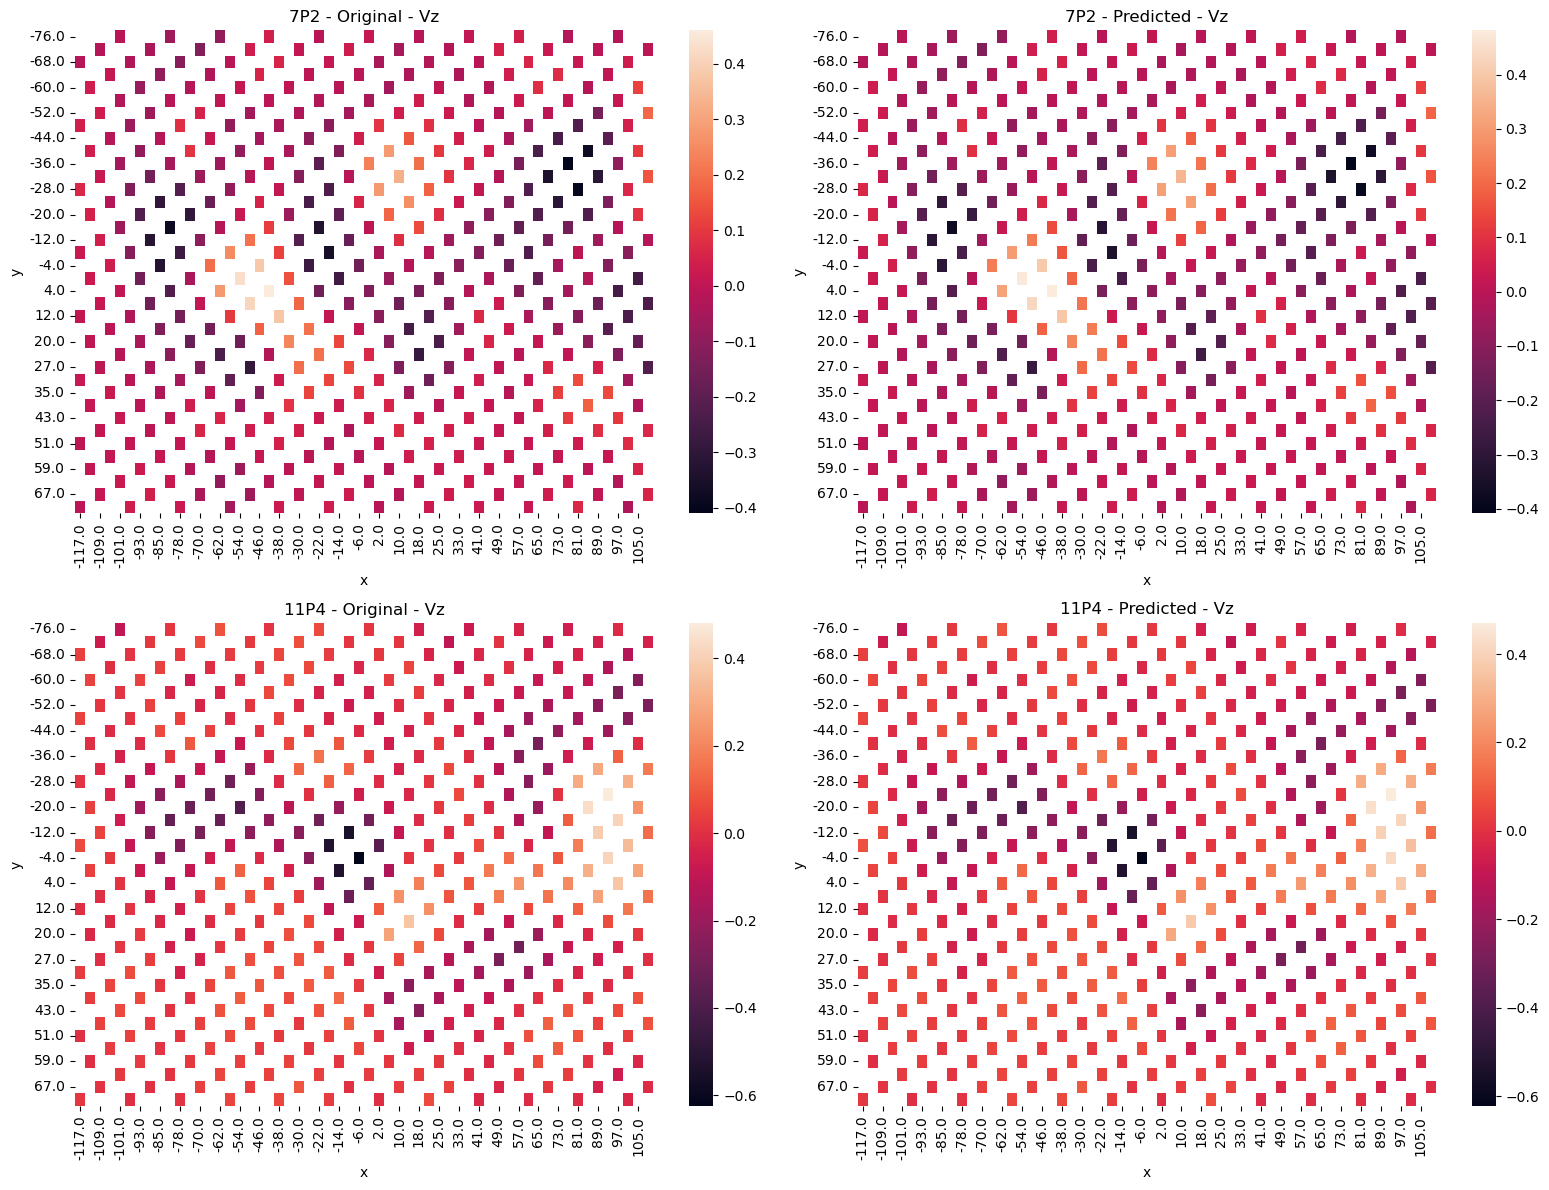

In [140]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

pivot_table1 = filtered_7p2[filtered_7p2["z"] == -25.0].pivot(index='y', columns='x', values='orig_z')
sns.heatmap(pivot_table1, ax=axs[0, 0])
axs[0, 0].set_title('7P2 - Original - Vz')

pivot_table2 = df_7p2_res[df_7p2_res["z"] == -25.0].pivot(index='y', columns='x', values='orig_z')
sns.heatmap(pivot_table2, ax=axs[0, 1])
axs[0, 1].set_title('7P2 - Predicted - Vz')

pivot_table3 = filtered_11p4[filtered_11p4["z"] == -25.0].pivot(index='y', columns='x', values='orig_z')
sns.heatmap(pivot_table3, ax=axs[1, 0])
axs[1, 0].set_title('11P4 - Original - Vz')

pivot_table4 = df_11p4_res[df_11p4_res["z"] == -25.0].pivot(index='y', columns='x', values='orig_z')
sns.heatmap(pivot_table4, ax=axs[1, 1])
axs[1, 1].set_title('11P4 - Predicted - Vz')

plt.tight_layout()
plt.show()

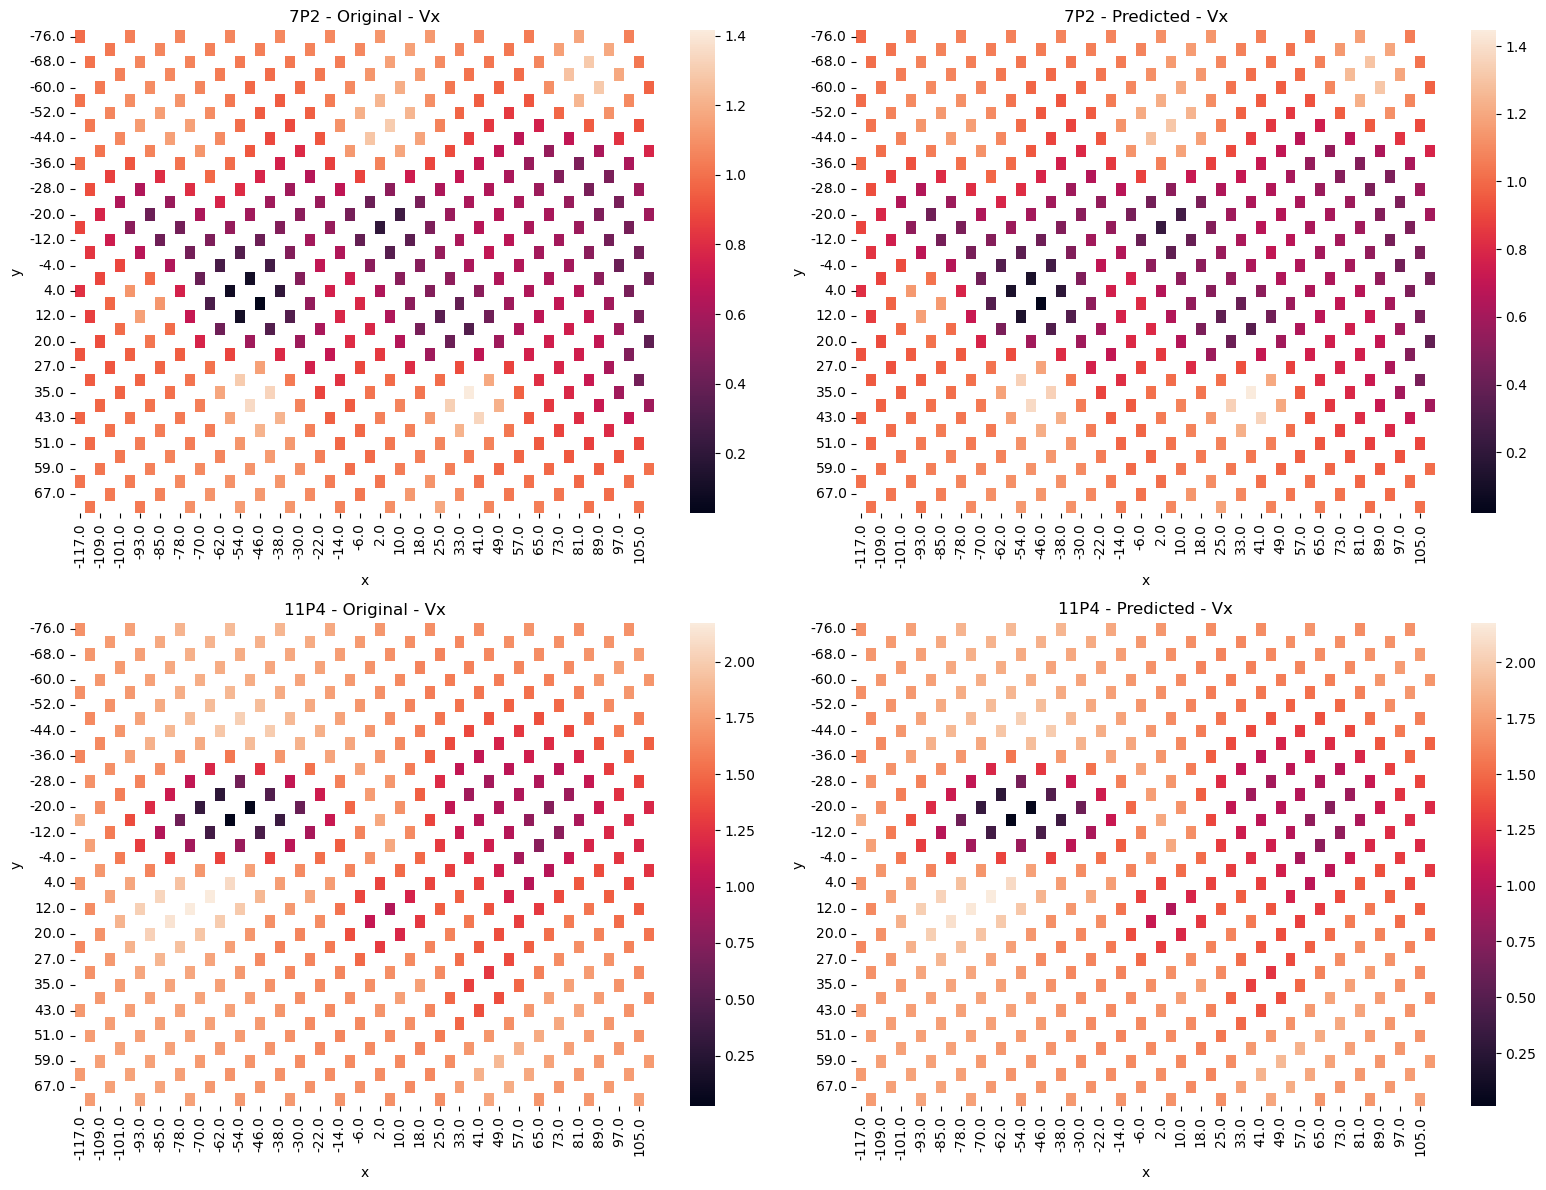

In [141]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

pivot_table1 = filtered_7p2[filtered_7p2["z"] == 18.0].pivot(index='y', columns='x', values='orig_x')
sns.heatmap(pivot_table1, ax=axs[0, 0])
axs[0, 0].set_title('7P2 - Original - Vx')

pivot_table2 = df_7p2_res[df_7p2_res["z"] == 18.0].pivot(index='y', columns='x', values='orig_x')
sns.heatmap(pivot_table2, ax=axs[0, 1])
axs[0, 1].set_title('7P2 - Predicted - Vx')

pivot_table3 = filtered_11p4[filtered_11p4["z"] == 18.0].pivot(index='y', columns='x', values='orig_x')
sns.heatmap(pivot_table3, ax=axs[1, 0])
axs[1, 0].set_title('11P4 - Original - Vx')

pivot_table4 = df_11p4_res[df_11p4_res["z"] == 18.0].pivot(index='y', columns='x', values='orig_x')
sns.heatmap(pivot_table4, ax=axs[1, 1])
axs[1, 1].set_title('11P4 - Predicted - Vx')

plt.tight_layout()
plt.show()

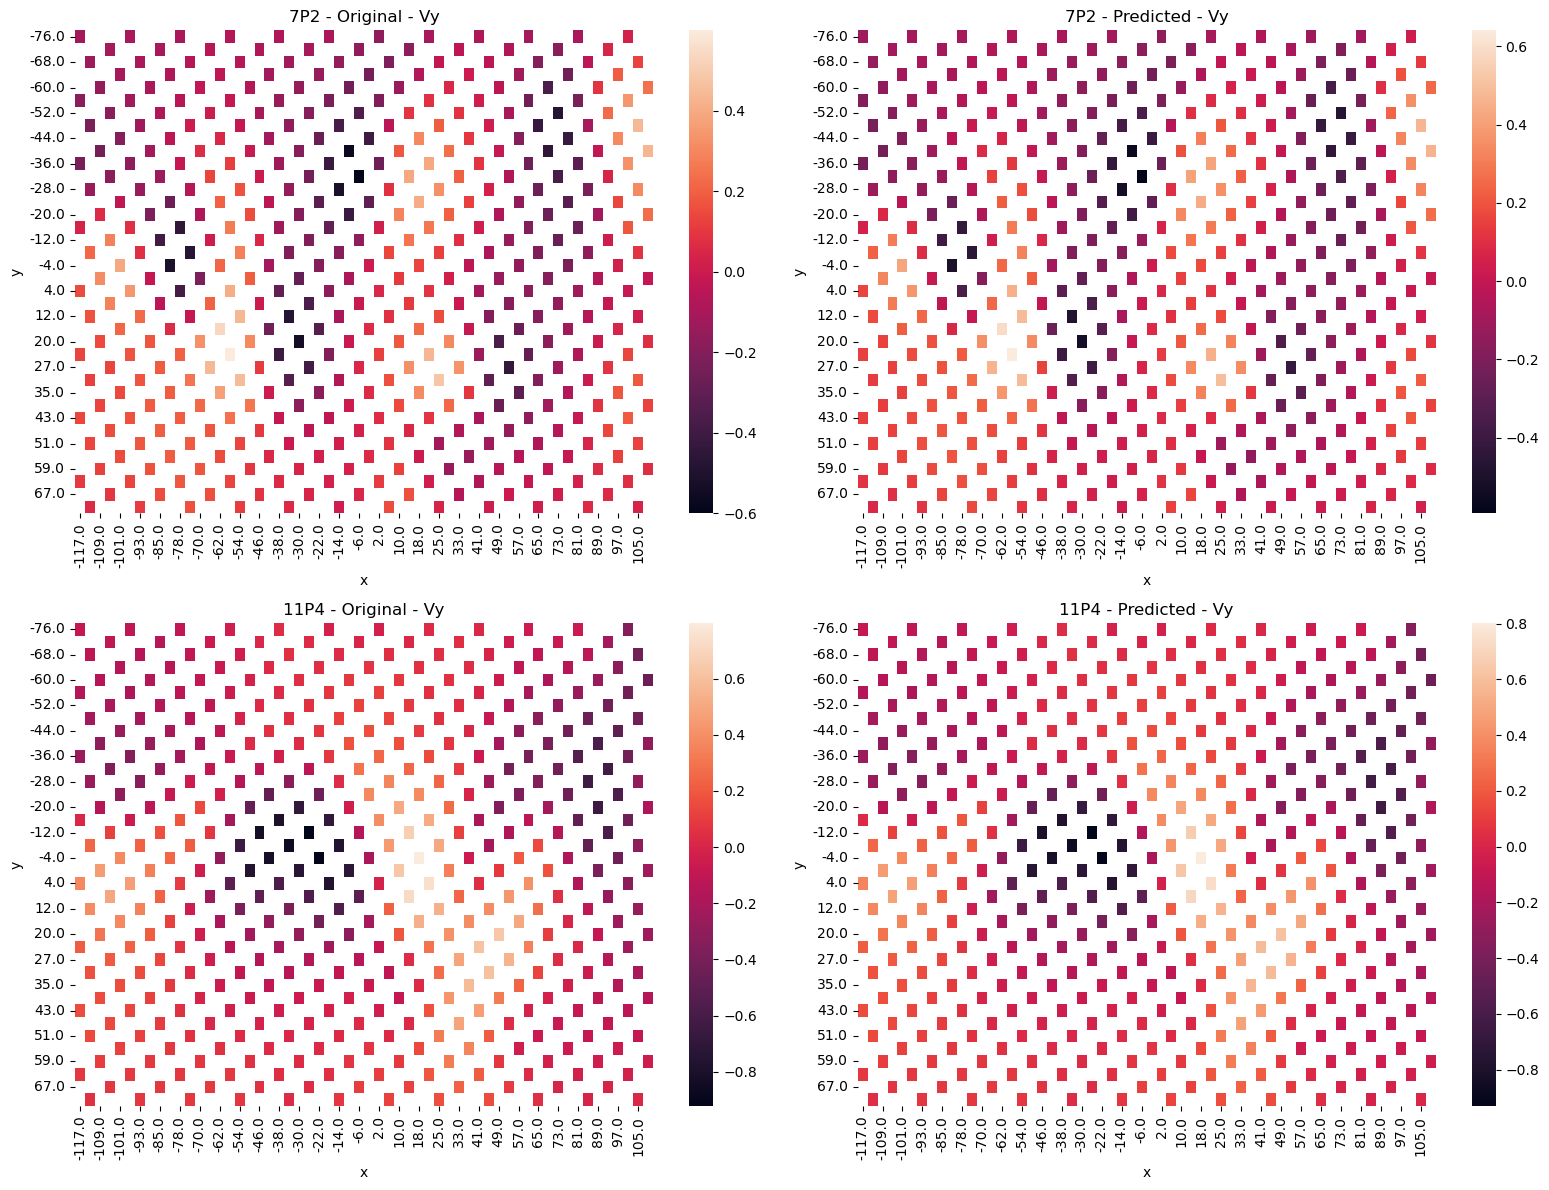

In [142]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

pivot_table1 = filtered_7p2[filtered_7p2["z"] == 18.0].pivot(index='y', columns='x', values='orig_y')
sns.heatmap(pivot_table1, ax=axs[0, 0])
axs[0, 0].set_title('7P2 - Original - Vy')

pivot_table2 = df_7p2_res[df_7p2_res["z"] == 18.0].pivot(index='y', columns='x', values='orig_y')
sns.heatmap(pivot_table2, ax=axs[0, 1])
axs[0, 1].set_title('7P2 - Predicted - Vy')

pivot_table3 = filtered_11p4[filtered_11p4["z"] == 18.0].pivot(index='y', columns='x', values='orig_y')
sns.heatmap(pivot_table3, ax=axs[1, 0])
axs[1, 0].set_title('11P4 - Original - Vy')

pivot_table4 = df_11p4_res[df_11p4_res["z"] == 18.0].pivot(index='y', columns='x', values='orig_y')
sns.heatmap(pivot_table4, ax=axs[1, 1])
axs[1, 1].set_title('11P4 - Predicted - Vy')

plt.tight_layout()
plt.show()

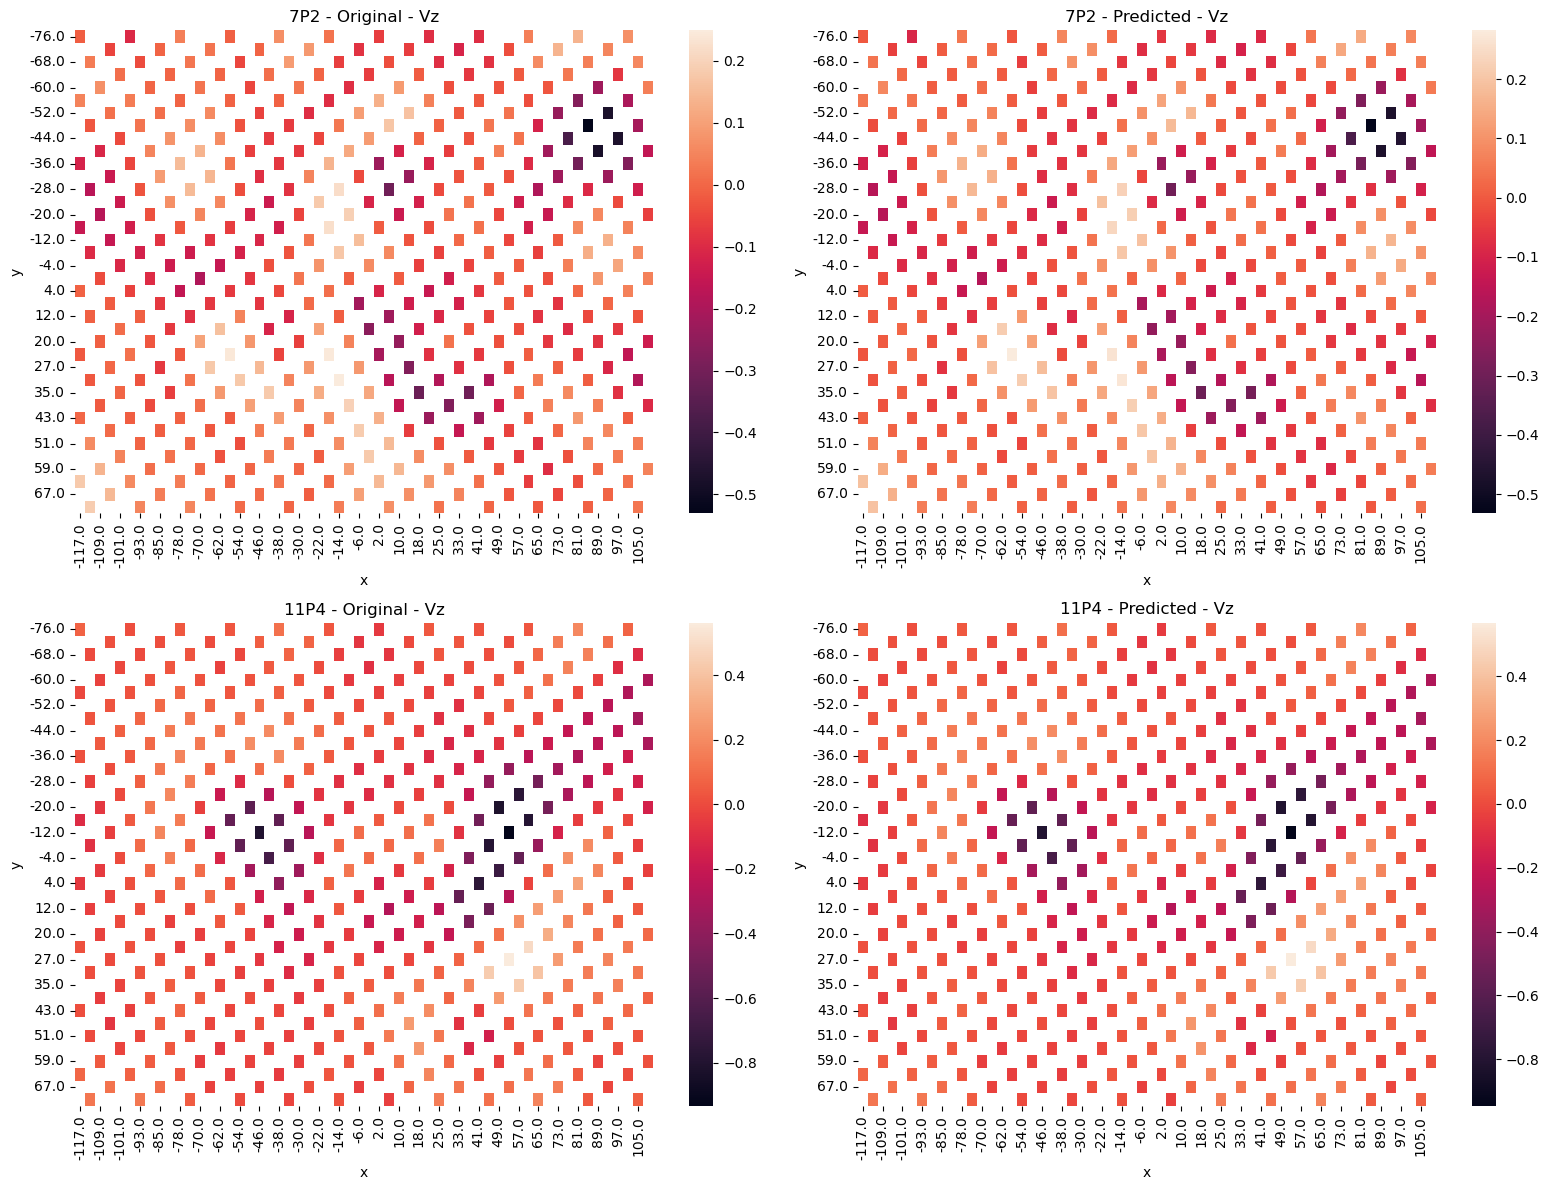

In [143]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

pivot_table1 = filtered_7p2[filtered_7p2["z"] == 18.0].pivot(index='y', columns='x', values='orig_z')
sns.heatmap(pivot_table1, ax=axs[0, 0])
axs[0, 0].set_title('7P2 - Original - Vz')

pivot_table2 = df_7p2_res[df_7p2_res["z"] == 18.0].pivot(index='y', columns='x', values='orig_z')
sns.heatmap(pivot_table2, ax=axs[0, 1])
axs[0, 1].set_title('7P2 - Predicted - Vz')

pivot_table3 = filtered_11p4[filtered_11p4["z"] == 18.0].pivot(index='y', columns='x', values='orig_z')
sns.heatmap(pivot_table3, ax=axs[1, 0])
axs[1, 0].set_title('11P4 - Original - Vz')

pivot_table4 = df_11p4_res[df_11p4_res["z"] == 18.0].pivot(index='y', columns='x', values='orig_z')
sns.heatmap(pivot_table4, ax=axs[1, 1])
axs[1, 1].set_title('11P4 - Predicted - Vz')

plt.tight_layout()
plt.show()

In [61]:
df_11p4_res['coord'] = df_11p4_res['coord'].apply(literal_eval)
df_11p4_res['result'] = df_11p4_res['result'].apply(literal_eval)

KeyError: 'coord'

In [46]:
df_res[["x","y","z"]] = pd.DataFrame(df_res['coord'].to_list(), index=df_res.index)
df_res[[f'latent_{i}' for i in range(47)]] = pd.DataFrame(df_res['result'].to_list(), index=df_res.index)

In [48]:
df_res['result'] = df_res['result'].apply(tuple)


In [49]:
df_res

coord  time  \
0     [-117.0, 71.0, -25.0]     5   
1      [-97.0, 71.0, -25.0]     5   
2      [-78.0, 71.0, -25.0]     5   
3      [-58.0, 71.0, -25.0]     5   
4      [-38.0, 71.0, -25.0]     5   
...                     ...   ...   
5285    [22.0, -76.0, 18.0]     5   
5286    [41.0, -76.0, 18.0]     5   
5287    [61.0, -76.0, 18.0]     5   
5288    [81.0, -76.0, 18.0]     5   
5289   [101.0, -76.0, 18.0]     5   

                                                 result      x     y     z  \
0     (-0.0424233078956604, -0.027562923729419708, -... -117.0  71.0 -25.0   
1     (-0.045458048582077026, -0.024815969169139862,...  -97.0  71.0 -25.0   
2     (-0.05860590189695358, -0.0295853391289711, -0...  -78.0  71.0 -25.0   
3     (-0.050871506333351135, -0.030095718801021576,...  -58.0  71.0 -25.0   
4     (-0.062006786465644836, -0.028094366192817688,...  -38.0  71.0 -25.0   
...                                                 ...    ...   ...   ...   
5285  (-0.05964704602956772, -0.020498864352703094, ...   22.0 -76.0  18.0   
5286  (-0.05415233224630356, -0.0214945450425148, -0...   41.0 -76.0  18.0   
5287  (-0.07923995703458786, -0.027645863592624664, ...   61.0 -76.0  18.0   
5288  (-0.07928676158189774, -0.01814395934343338, -...   81.0 -76.0  18.0   
5289  (-0.06297900527715683, -0.017919190227985382, ...  101.0 -76.0  18.0   

      latent_0  latent_1  latent_2  latent_3  ...  latent_37  latent_38  \
0    -0.042423 -0.027563 -0.066470 -0.124332  ...   0.126854  -0.138008   
1    -0.045458 -0.024816 -0.062963 -0.129485  ...   0.129391  -0.144670   
2    -0.058606 -0.029585 -0.061603 -0.136149  ...   0.132831  -0.135983   
3    -0.050872 -0.030096 -0.055516 -0.129107  ...   0.129963  -0.138124   
4    -0.062007 -0.028094 -0.045811 -0.135375  ...   0.134505  -0.137615   
...        ...       ...       ...       ...  ...        ...        ...   
5285 -0.059647 -0.020499 -0.055552 -0.129533  ...   0.128462  -0.137553   
5286 -0.054152 -0.021495 -0.070256 -0.130441  ...   0.121860  -0.135399   
5287 -0.079240 -0.027646 -0.059440 -0.130612  ...   0.138239  -0.143926   
5288 -0.079287 -0.018144 -0.041577 -0.146105  ...   0.133408  -0.133126   
5289 -0.062979 -0.017919 -0.063666 -0.127576  ...   0.111752  -0.157529   

      latent_39  latent_40  latent_41  latent_42  latent_43  latent_44  \
0      0.058377  -0.166917  -0.018291  -0.024412   0.014820  -0.125044   
1      0.059968  -0.162638  -0.012425  -0.017557   0.009342  -0.124235   
2      0.056606  -0.170577  -0.017597  -0.008349   0.028589  -0.127978   
3      0.069726  -0.165377  -0.017596  -0.021302   0.016412  -0.116320   
4      0.072289  -0.153192  -0.028497  -0.008474   0.023993  -0.125941   
...         ...        ...        ...        ...        ...        ...   
5285   0.054210  -0.161258  -0.015053  -0.029023   0.015504  -0.130982   
5286   0.046684  -0.163906  -0.024760  -0.035273   0.012391  -0.111558   
5287   0.049624  -0.158669  -0.010884  -0.019061  -0.023468  -0.110145   
5288   0.068890  -0.140962  -0.046298  -0.034063  -0.047452  -0.094285   
5289   0.087601  -0.186105  -0.044829  -0.024492  -0.053753  -0.052867   

      latent_45  latent_46  
0     -0.057959   0.193453  
1     -0.066208   0.188897  
2     -0.061837   0.190791  
3     -0.056732   0.194606  
4     -0.061652   0.188644  
...         ...        ...  
5285  -0.069055   0.182345  
5286  -0.067463   0.181833  
5287  -0.075845   0.170390  
5288  -0.105580   0.174066  
5289  -0.073998   0.165005  

[5290 rows x 53 columns]

In [53]:
model_path = '/Users/HesamFallahian/Sources/cgan/saved_models/WAE_0043_Latent_model_at_epoch_100.pth'

latent_decoder_ring = LatentDecoderRing(model_path)

latent_to_test = (
        0.0016609601443633400, -0.06601393222808840, 0.021077390760183300, -0.13154523074626900, -0.15110088884830500,
        0.04137573391199110, -0.06271442770957950, -0.018788935616612400, -0.016477329656481700, 0.014670094475150100,
        -0.10086174309253700, -0.10708082467317600, -0.12330683320760700, 0.034600842744112000, 0.14157919585704800,
        0.0019909527618438000, -0.005840592551976440, 0.022894499823451000, -0.0940292701125145, 0.011661662720143800,
        -0.024760905653238300, 0.01394357904791830, 0.17982156574726100, -0.09126611053943630, -0.006662970408797260,
        -0.17246569693088500, -0.12952108681201900, -0.07109915465116500, 0.01139246579259630, -0.004217864014208320,
        0.19345444440841700, 0.06585617363452910, -0.00018190965056419400, 0.055017318576574300, -0.14957641065120700,
        -0.07215620577335360, 0.03764599561691280, 0.08266445994377140, -0.04003885015845300, -0.0050844112411141400,
        0.0023697048891335700, 0.021520741283893600, -0.030277807265520100, -0.00461758766323328, -0.1040034145116810,
        -0.17451749742031100, 0.14400756359100300)
latent_to_test = torch.tensor(latent_to_test)
end_result = latent_decoder_ring.Centroid_Only_DeNormalized(latent_to_test)

print(type(end_result))
print(end_result)

<class 'tuple'>
(0.748672024011612, 0.09024499654769909, 0.12936358630657208)


In [54]:
model_path = '/Users/HesamFallahian/Sources/cgan/saved_models/WAE_v11/model_at_epoch_450.pth'

latent_decoder_ring = LatentDecoderRing(model_path)

latent_to_test = (
        0.0016609601443633400, -0.06601393222808840, 0.021077390760183300, -0.13154523074626900, -0.15110088884830500,
        0.04137573391199110, -0.06271442770957950, -0.018788935616612400, -0.016477329656481700, 0.014670094475150100,
        -0.10086174309253700, -0.10708082467317600, -0.12330683320760700, 0.034600842744112000, 0.14157919585704800,
        0.0019909527618438000, -0.005840592551976440, 0.022894499823451000, -0.0940292701125145, 0.011661662720143800,
        -0.024760905653238300, 0.01394357904791830, 0.17982156574726100, -0.09126611053943630, -0.006662970408797260,
        -0.17246569693088500, -0.12952108681201900, -0.07109915465116500, 0.01139246579259630, -0.004217864014208320,
        0.19345444440841700, 0.06585617363452910, -0.00018190965056419400, 0.055017318576574300, -0.14957641065120700,
        -0.07215620577335360, 0.03764599561691280, 0.08266445994377140, -0.04003885015845300, -0.0050844112411141400,
        0.0023697048891335700, 0.021520741283893600, -0.030277807265520100, -0.00461758766323328, -0.1040034145116810,
        -0.17451749742031100, 0.14400756359100300)
latent_to_test = torch.tensor(latent_to_test)
end_result = latent_decoder_ring.Centroid_Only_DeNormalized(latent_to_test)

print(type(end_result))
print(end_result)

<class 'tuple'>
(-0.5827024734020232, -1.2405872216820717, -0.890974179804325)


In [41]:
df_res.drop(columns=['coord','result'], inplace=True)

In [42]:
df_res

time      x     y     z  latent_0  latent_1  latent_2  latent_3  \
0        5 -117.0  71.0 -25.0 -0.042423 -0.027563 -0.066470 -0.124332   
1        5  -97.0  71.0 -25.0 -0.045458 -0.024816 -0.062963 -0.129485   
2        5  -78.0  71.0 -25.0 -0.058606 -0.029585 -0.061603 -0.136149   
3        5  -58.0  71.0 -25.0 -0.050872 -0.030096 -0.055516 -0.129107   
4        5  -38.0  71.0 -25.0 -0.062007 -0.028094 -0.045811 -0.135375   
...    ...    ...   ...   ...       ...       ...       ...       ...   
5285     5   22.0 -76.0  18.0 -0.059647 -0.020499 -0.055552 -0.129533   
5286     5   41.0 -76.0  18.0 -0.054152 -0.021495 -0.070256 -0.130441   
5287     5   61.0 -76.0  18.0 -0.079240 -0.027646 -0.059440 -0.130612   
5288     5   81.0 -76.0  18.0 -0.079287 -0.018144 -0.041577 -0.146105   
5289     5  101.0 -76.0  18.0 -0.062979 -0.017919 -0.063666 -0.127576   

      latent_4  latent_5  ...  latent_37  latent_38  latent_39  latent_40  \
0    -0.188019  0.052074  ...   0.126854  -0.138008   0.058377  -0.166917   
1    -0.195268  0.045797  ...   0.129391  -0.144670   0.059968  -0.162638   
2    -0.193426  0.039502  ...   0.132831  -0.135983   0.056606  -0.170577   
3    -0.185530  0.045153  ...   0.129963  -0.138124   0.069726  -0.165377   
4    -0.198459  0.036928  ...   0.134505  -0.137615   0.072289  -0.153192   
...        ...       ...  ...        ...        ...        ...        ...   
5285 -0.187819  0.037268  ...   0.128462  -0.137553   0.054210  -0.161258   
5286 -0.193452  0.039079  ...   0.121860  -0.135399   0.046684  -0.163906   
5287 -0.183469  0.042791  ...   0.138239  -0.143926   0.049624  -0.158669   
5288 -0.189404  0.043527  ...   0.133408  -0.133126   0.068890  -0.140962   
5289 -0.197293  0.023886  ...   0.111752  -0.157529   0.087601  -0.186105   

      latent_41  latent_42  latent_43  latent_44  latent_45  latent_46  
0     -0.018291  -0.024412   0.014820  -0.125044  -0.057959   0.193453  
1     -0.012425  -0.017557   0.009342  -0.124235  -0.066208   0.188897  
2     -0.017597  -0.008349   0.028589  -0.127978  -0.061837   0.190791  
3     -0.017596  -0.021302   0.016412  -0.116320  -0.056732   0.194606  
4     -0.028497  -0.008474   0.023993  -0.125941  -0.061652   0.188644  
...         ...        ...        ...        ...        ...        ...  
5285  -0.015053  -0.029023   0.015504  -0.130982  -0.069055   0.182345  
5286  -0.024760  -0.035273   0.012391  -0.111558  -0.067463   0.181833  
5287  -0.010884  -0.019061  -0.023468  -0.110145  -0.075845   0.170390  
5288  -0.046298  -0.034063  -0.047452  -0.094285  -0.105580   0.174066  
5289  -0.044829  -0.024492  -0.053753  -0.052867  -0.073998   0.165005  

[5290 rows x 51 columns]